# Assignment 2

Due Date:  11:59pm on Friday, October 2nd (for now)

## Question 1 - Fitting Part Deux

In the Jupyter Notebook called Fitting_Examples.ipynb, the last few examples considered cases where the uncertainty in the data became
larger at small x-values.  We considered three scenarios for collecting
the data - one where we focused on small x-values, and two others that covered larger ranges of x.

For this question, begin with the Jupyter Notebook above, and modify it
to consider 10 x-value ranges that keep the minimum value of the range constant (and fairly close to zero) while varying the maximum x-value from small to larger values.  For each x-value range, calculate the uncertainty in the y-intercept, and then create a plot of the uncertainty as a function of that maximum x-value of the range.

Now, consider keeping the maximum x-value of the range constant, and vary the minimum value of the range from a small value, close to zero, to a larger value that is close to the maximum value.  Create a plot of the
uncertainty in the y-intercept as a function of the minimum x-value of the range.

What can you conclude from this study about the optimal experiment design?

Coefficients (from curve_fit)
[-0.09334942  1.08677381]
Covariance Matrix (from curve_fit)
[[ 0.01664427 -0.02377753]
 [-0.02377753  0.04755506]]

Final Result: y = (1.09 +/- 0.22) x + (-0.09 +/- 0.13)


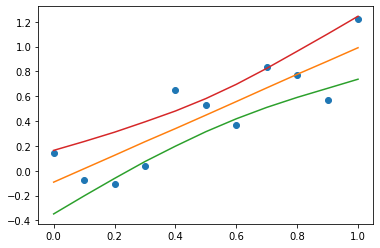

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:65: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


<ErrorbarContainer object of 3 artists>

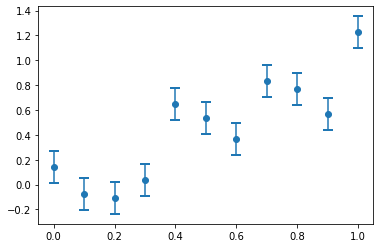

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats


#1

npts = 11
xlow = 0
xhigh = 1

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

from scipy.optimize import curve_fit

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)


















Coefficients (from curve_fit)
[0.00116191 1.0023122 ]
Covariance Matrix (from curve_fit)
[[ 0.00561992 -0.00401425]
 [-0.00401425  0.00401425]]

Final Result: y = (1.00 +/- 0.06) x + (0.00 +/- 0.07)


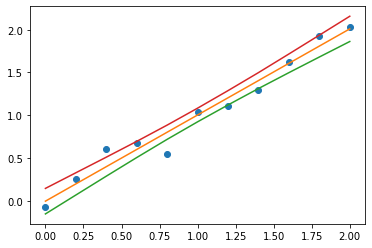

In [3]:
#2

npts = 11
xlow = 0
xhigh = 2

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')




In [4]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()


,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,1.002312,0.063358,0.001162,0.074966


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

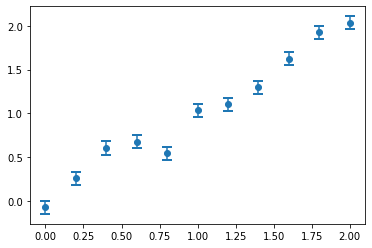

In [5]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[-0.08294793  1.00890251]
Covariance Matrix (from curve_fit)
[[ 0.0193929  -0.00923471]
 [-0.00923471  0.00615647]]

Final Result: y = (1.01 +/- 0.08) x + (-0.08 +/- 0.14)


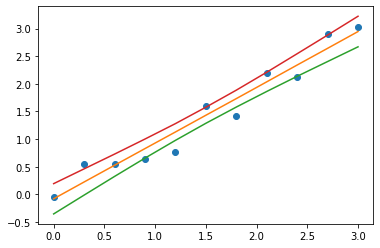

In [6]:
#3

npts = 11
xlow = 0
xhigh = 3

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')




In [7]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()


,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,1.008903,0.078463,-0.082948,0.139258


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

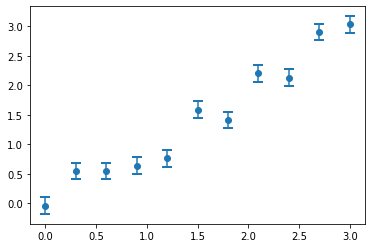

In [8]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

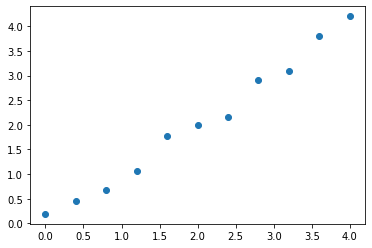

In [9]:
#4

npts = 11
xlow = 0
xhigh = 4

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

plt.plot(xi,yi,'o')



In [10]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()


,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,1.008903,0.078463,-0.082948,0.139258


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

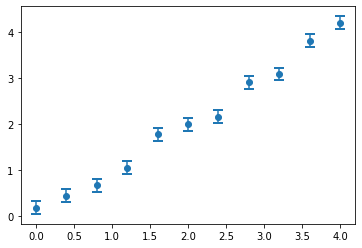

In [11]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[0.21898929 0.90080742]
Covariance Matrix (from curve_fit)
[[ 0.01508052 -0.00430872]
 [-0.00430872  0.00172349]]

Final Result: y = (0.90 +/- 0.04) x + (0.22 +/- 0.12)


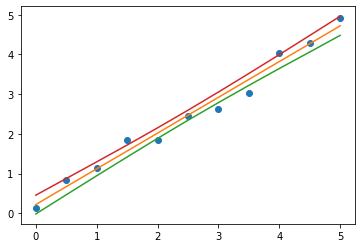

In [12]:
#5

npts = 11
xlow = 0
xhigh = 5

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom
def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')




In [13]:

df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()


,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,0.900807,0.041515,0.218989,0.122803


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

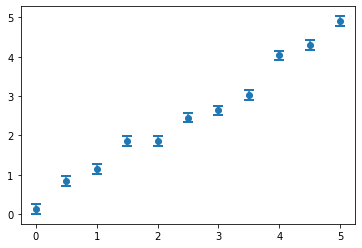

In [14]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[-0.03945412  1.01916561]
Covariance Matrix (from curve_fit)
[[ 0.00763656 -0.00181823]
 [-0.00181823  0.00060608]]

Final Result: y = (1.02 +/- 0.02) x + (-0.04 +/- 0.09)


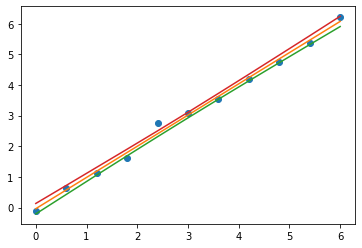

In [15]:
#6

npts = 11
xlow = 0
xhigh = 6

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')



In [16]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()


,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,1.019166,0.024619,-0.039454,0.087387


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

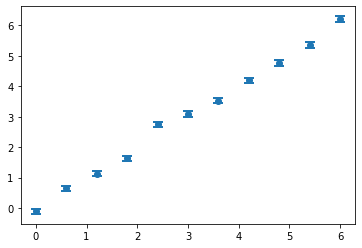

In [17]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[0.24475762 0.95953728]
Covariance Matrix (from curve_fit)
[[ 0.0102894  -0.00209988]
 [-0.00209988  0.00059996]]

Final Result: y = (0.96 +/- 0.02) x + (0.24 +/- 0.10)


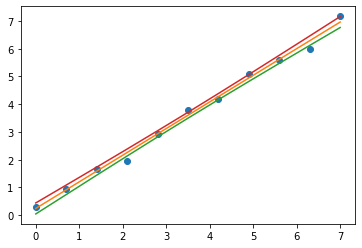

In [18]:
#7

npts = 11
xlow = 0
xhigh = 7

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')





In [19]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,0.959537,0.024494,0.244758,0.101437


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

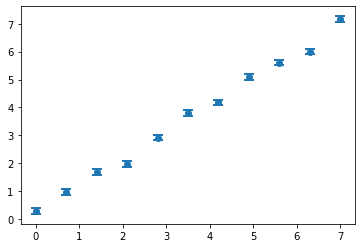

In [20]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[-0.08073601  1.01937199]
Covariance Matrix (from curve_fit)
[[ 0.00639863 -0.00114261]
 [-0.00114261  0.00028565]]

Final Result: y = (1.02 +/- 0.02) x + (-0.08 +/- 0.08)


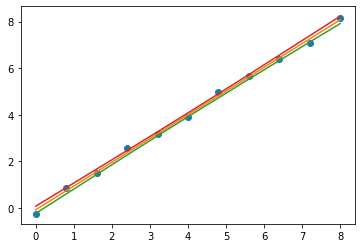

In [21]:
#8

npts = 11
xlow = 0
xhigh = 8

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')



In [22]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()


,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,1.019372,0.016901,-0.080736,0.079991


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

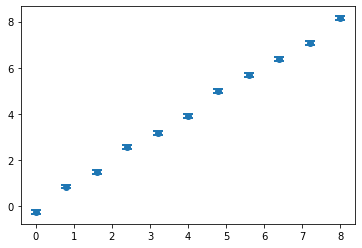

In [23]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[-0.06812026  0.98903934]
Covariance Matrix (from curve_fit)
[[ 0.00658212 -0.00104478]
 [-0.00104478  0.00023217]]

Final Result: y = (0.99 +/- 0.02) x + (-0.07 +/- 0.08)


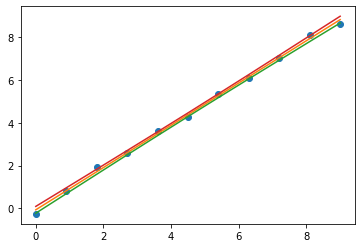

In [24]:
#9

npts = 11
xlow = 0
xhigh = 9

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')





In [25]:

df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,0.989039,0.015237,-0.06812,0.08113


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

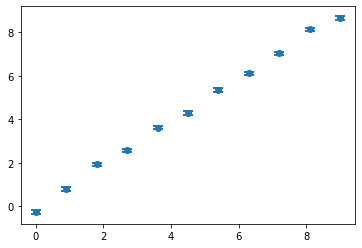

In [26]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[0.11382275 0.99453705]
Covariance Matrix (from curve_fit)
[[ 0.00441971 -0.00063139]
 [-0.00063139  0.00012628]]

Final Result: y = (0.99 +/- 0.01) x + (0.11 +/- 0.07)


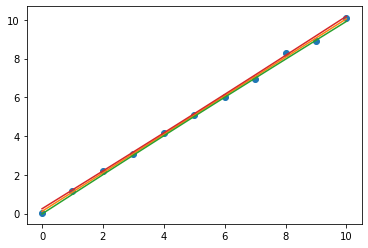

In [27]:
#10

npts = 11
xlow = 0
xhigh = 10

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')


In [28]:

df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()


,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,0.994537,0.011237,0.113823,0.066481


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

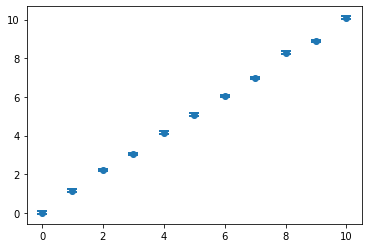

In [29]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[-0.04701816  1.01206444]
Covariance Matrix (from curve_fit)
[[ 0.01258563 -0.00178098]
 [-0.00178098  0.00029683]]

Final Result: y = (1.01 +/- 0.02) x + (-0.05 +/- 0.11)


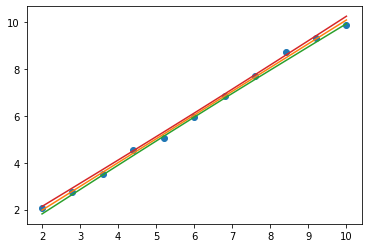

In [30]:
#11

npts = 11
xlow = 2
xhigh = 10

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')



In [31]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,1.012064,0.017229,-0.047018,0.112186


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

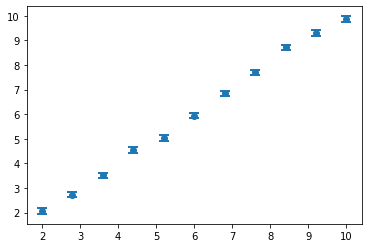

In [32]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[0.23862207 0.96700454]
Covariance Matrix (from curve_fit)
[[ 0.03436064 -0.00457271]
 [-0.00457271  0.00065324]]

Final Result: y = (0.97 +/- 0.03) x + (0.24 +/- 0.19)


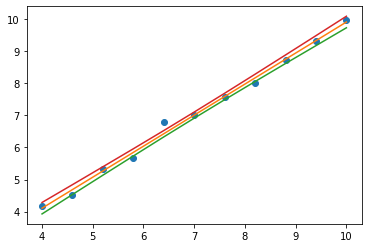

In [33]:
#12

npts = 11
xlow = 4
xhigh = 10

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')

In [34]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,0.967005,0.025559,0.238622,0.185366


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

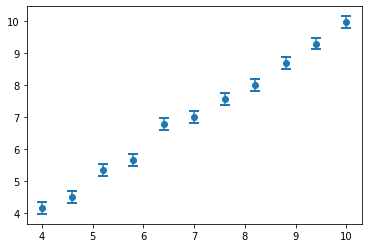

In [35]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[-0.41475639  1.04333533]
Covariance Matrix (from curve_fit)
[[ 0.21050235 -0.02567102]
 [-0.02567102  0.00320888]]

Final Result: y = (1.04 +/- 0.06) x + (-0.41 +/- 0.46)


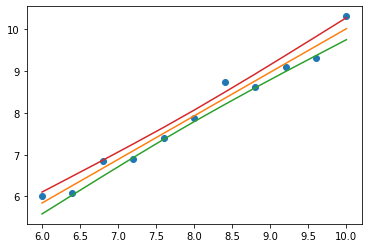

In [36]:
#13

npts = 11
xlow = 6
xhigh = 10

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')

In [37]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,1.043335,0.056647,-0.414756,0.458805


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

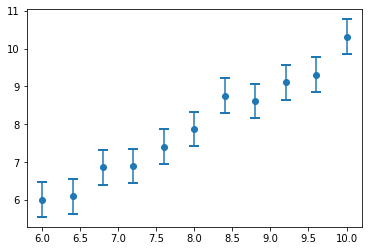

In [38]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[1.88625997 0.79159697]
Covariance Matrix (from curve_fit)
[[ 0.81390512 -0.08998951]
 [-0.08998951  0.00999883]]

Final Result: y = (0.79 +/- 0.10) x + (1.89 +/- 0.90)


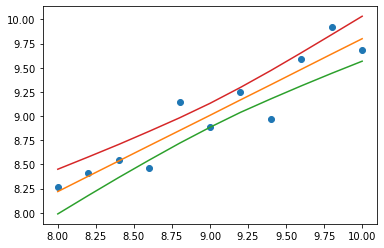

In [39]:
#14

npts = 11
xlow = 8
xhigh = 10

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')

In [40]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,0.791597,0.099994,1.88626,0.902167


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

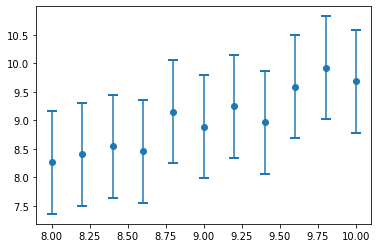

In [41]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

Coefficients (from curve_fit)
[2.25797686 0.75456448]
Covariance Matrix (from curve_fit)
[[ 3.2054142  -0.33703857]
 [-0.33703857  0.03547774]]

Final Result: y = (0.75 +/- 0.19) x + (2.26 +/- 1.79)


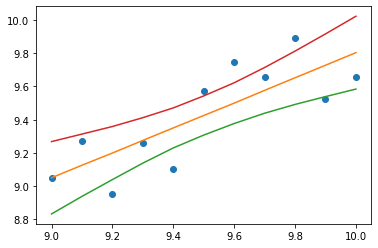

In [42]:
#15

npts = 11
xlow = 9
xhigh = 10

xl = xlow + 0.01
xmid = (xhigh+xlow)/2.0+0.01

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2)
yi = xi + yrandom

def fitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]
popt, pcov = curve_fit(fitfunction,xi,yi,p0=init_vals)
perr = np.sqrt(np.diag(pcov))

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([fitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Coefficients (from curve_fit)")
print (popt)
print("Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Final Result: y = (%0.2f +/- %0.2f) x + (%0.2f +/- %0.2f)" % (popt[1],perr[1],popt[0],perr[0]))

plt.plot(xi,yi,'o')

plt.plot(xi,middle)
plt.plot(xi,lower)
plt.plot(xi,upper)
plt.show()

slope = []
dslope = []
yint = []
dyint = []
type = []

slope.append(popt[1])
dslope.append(perr[1])
yint.append(popt[0])
dyint.append(perr[0])
type.append('Linear')

In [43]:
df = pd.DataFrame({'Fit Type':type, 'Slope':slope, 'Error in Slope':dslope, 'Y Intercept':yint, 'Error in Y Intercept':dyint})
df.head()

,Fit Type,Slope,Error in Slope,Y Intercept,Error in Y Intercept
0,Linear,0.754564,0.188355,2.257977,1.790367


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.
  


<ErrorbarContainer object of 3 artists>

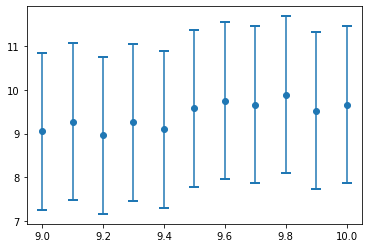

In [44]:
sigmai = np.array([dyint for i in range(npts)])
plt.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)

## Question 2 - Why is it cold?

Modify the Jupyter Notebook called GlobalTemperatures.ipynb to consider the temperature variations over the year for five locations - two in the northern hemisphere, one near the equator, and two in the southern hemisphere.  Do not use any of the same locations already considered.

What are the scale factors and offsets required to give a reasonable fit in each case?

In [45]:
import datetime
import numpy as np

class Sun:

    def getSunriseTime( self, coords ):
        return self.calcSunTime( coords, True )

    def getSunsetTime( self, coords ):
        return self.calcSunTime( coords, False )

    def getCurrentUTC( self ):
        now = datetime.datetime.now()
        return [ now.day, now.month, now.year ]

    def calcSunTime( self, coords, isRiseTime, zenith = 90.8 ):

        # isRiseTime == False, returns sunsetTime

        day, month, year = self.getCurrentUTC()
        #print (day,month,year)

        longitude = coords['longitude']
        latitude = coords['latitude']

        TO_RAD = np.pi/180

        ##1. first calculate the day of the year
        #N1 = math.floor(275 * month / 9)
        #N2 = math.floor((month + 9) / 12)
        #N3 = (1 + math.floor((year - 4 * math.floor(year / 4) + 2) / 3))
        #N = N1 - (N2 * N3) + day - 30

	# EJB:  Modify to calculate the times for all days of the year!!
        N = np.array([i for i in range(1,366)])

        #2. convert the longitude to hour value and calculate an approximate time
        lngHour = longitude / 15

        if isRiseTime:
            t = N + ((6 - lngHour) / 24)
        else: #sunset
            t = N + ((18 - lngHour) / 24)

        #3. calculate the Sun's mean anomaly
        M = (0.9856 * t) - 3.289

        #4. calculate the Sun's true longitude
        L = M + (1.916 * np.sin(TO_RAD*M)) + (0.020 * np.sin(TO_RAD * 2 * M)) + 282.634
        L = self.forceRange( L, 360 ) #NOTE: L adjusted into the range [0,360)

        #5a. calculate the Sun's right ascension

        RA = (1/TO_RAD) * np.arctan(0.91764 * np.tan(TO_RAD*L))
        RA = self.forceRange( RA, 360 ) #NOTE: RA adjusted into the range [0,360)

        #5b. right ascension value needs to be in the same quadrant as L
        Lquadrant  = (np.floor( L/90)) * 90
        RAquadrant = (np.floor(RA/90)) * 90
        RA = RA + (Lquadrant - RAquadrant)

        #5c. right ascension value needs to be converted into hours
        RA = RA / 15

        #6. calculate the Sun's declination
        sinDec = 0.39782 * np.sin(TO_RAD*L)
        cosDec = np.cos(np.arcsin(sinDec))

        #7a. calculate the Sun's local hour angle
        cosH = (np.cos(TO_RAD*zenith) - (sinDec * np.sin(TO_RAD*latitude))) / (cosDec * np.cos(TO_RAD*latitude))

        #if cosH > 1:
        #    return {'status': False, 'msg': 'the sun never rises on this location (on the specified date)'}

        #if cosH < -1:
        #    return {'status': False, 'msg': 'the sun never sets on this location (on the specified date)'}

        #7b. finish calculating H and convert into hours

        if isRiseTime:
            H = 360 - (1/TO_RAD) * np.arccos(cosH)
        else: #setting
            H = (1/TO_RAD) * np.arccos(cosH)

        H = H / 15

        #8. calculate local mean time of rising/setting
        T = H + RA - (0.06571 * t) - 6.622

        #9. adjust back to UTC
        UT = T - lngHour
        #print (UT)
        UT = self.forceRange( UT, 24) # UTC time in decimal format (e.g. 23.23)
        #print (UT)

        #10. Return
        #hr = self.forceRange(UT, 24)
        #min = ((UT - UT.astype(int))*60,0)

        return {
            'status': True,
            'decimal': UT
            #'hr': hr,
            #'min': min 
        }

    def forceRange( self, v, max ):
        # force v to be >= 0 and < max
        for i in range(len(v)):
            if v[i] < 0:
                v[i] = v[i] + max
            elif v[i] >= max:
                v[i] = v[i] - max
        return v

36.8529
35.6804
0.3476
-33.8688
-33.4489


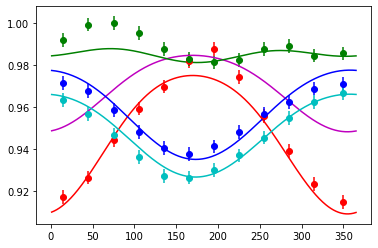

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Number of days in the sidereal year
daysPerYear = 365.256363

# Array to hold day of year

dayOfYear = np.array([i for i in range(1,366)])

# Earth-Sun Distance in A.U.
rES=1.0-0.01672*np.cos(2.0*np.pi/daysPerYear*(dayOfYear-4))
relPower=1/rES**2

# plt.plot(dayOfYear,relPower,'.')


def angleCalc(latitude):
  # tilt angle of the earth in 2020
  tiltAngle = -23.44*np.pi/180.0
  angle = tiltAngle*np.cos(2.0*np.pi/daysPerYear*(dayOfYear+10))
  
  print(latitude)
  return latitude*np.pi/180.0 - angle

# LOCATIONS
angleVirginiaBeach = {"coords": {'longitude': -75.9780, 'latitude': 36.8529}, 'angle': angleCalc(36.8529)}
angleTokyo = {'coords': {'longitude': 139.7690, 'latitude': 35.6804}, 'angle': angleCalc(35.6804)}
angleKampala = {'coords': {'longitude': 32.5825, 'latitude': 0.3476}, 'angle': angleCalc(0.3476)}
angleSydney = {'coords': {'longitude': 151.2093, 'latitude': -33.8688}, 'angle': angleCalc(-33.8688)}
angleSantiago = {'coords': {'longitude': -70.6693, 'latitude': -33.4489}, 'angle': angleCalc(-33.4489)}


#from Sun import Sun

coords = angleVirginiaBeach["coords"]
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
angleVirginiaBeach['lengthCorrection'] = dayLength/12.0


coords = angleTokyo["coords"]
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
angleTokyo['lengthCorrection'] = dayLength/12.0


coords = angleKampala["coords"]
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
angleKampala['lengthCorrection'] = dayLength/12.0


coords = angleSydney["coords"]
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
angleSydney['lengthCorrection'] = dayLength/12.0


coords = angleSantiago["coords"]
sun = Sun()
sunrise = sun.getSunriseTime(coords)['decimal']
sunset = sun.getSunsetTime(coords)['decimal']
dayLength = sun.getSunsetTime(coords)['decimal']-sun.getSunriseTime(coords)['decimal']
for i in range(len(dayLength)):
    if dayLength[i]<0:
        dayLength[i] = dayLength[i]+24
angleSantiago['lengthCorrection'] = dayLength/12.0


angleVirginiaBeach["tempTheory"] = (np.cos(angleVirginiaBeach['angle'])*relPower*np.sqrt(angleVirginiaBeach['lengthCorrection']))
angleTokyo["tempTheory"] = (np.cos(angleTokyo['angle'])*relPower*np.sqrt(angleTokyo['lengthCorrection']))
angleKampala["tempTheory"] = (np.cos(angleKampala['angle'])*relPower*np.sqrt(angleKampala['lengthCorrection']))
angleSydney["tempTheory"] = (np.cos(angleSydney['angle'])*relPower*np.sqrt(angleSydney['lengthCorrection']))
angleSantiago["tempTheory"] = (np.cos(angleSantiago['angle'])*relPower*np.sqrt(angleSantiago['lengthCorrection']))

#print(angleVirginiaBeach["tempTheory"])

# plt.plot(dayOfYear,angleVirginiaBeach["tempTheory"],'m')
# plt.plot(dayOfYear,angleTokyo["tempTheory"],'r')
# plt.plot(dayOfYear,angleKampala["tempTheory"],'g')
# plt.plot(dayOfYear,angleSydney["tempTheory"],'b')
# plt.plot(dayOfYear,angleSantiago["tempTheory"],'c')

angleVirginiaBeach['temp'] = np.array([4.6,5.5,9.2,14,18.6,23.2,25.7,25.2,22.3,11.5,6.7])+273.15 #https://en.climate-data.org/north-america/united-states-of-america/virginia/virginia-beach-764480/
angleTokyo['temp'] = np.array([5.1,5.8,8.6,14,18.6,21.8,25.5,27.3,23.2,17.5,12.4,7.7])+273.15 # https://en.climate-data.org/asia/japan/tokyo/tokyo-3292/
angleKampala['temp'] = np.array([26.6,28.6,30.8,31,29.6,27.3,25.8,25.3,25.6,27.2,27.7,26.3])+273.15 # https://en.climate-data.org/africa/burkina-faso/central-south/kampala-999745/
angleSydney['temp'] = np.array([22.2,22.3,21.1,18.4,15.2,12.9,12,13.1,15.2,17.8,19.5,21.5])+273.15 # https://en.climate-data.org/oceania/australia/new-south-wales/sydney-24/
angleSantiago['temp'] = np.array([20.8,19.8,17.8,14.8,11.6,8.8,8.6,9.7,11.8,14.4,17.2,19.6])+273.15 # https://en.climate-data.org/south-america/chile/region-metropolitana-de-santiago/santiago-938/

error = np.array([1 for i in range(12)])


normalization = max([np.amax(angleVirginiaBeach['temp']),
                     np.amax(angleTokyo['temp']),
                     np.amax(angleKampala['temp']),
                     np.amax(angleSydney['temp']),
                     np.amax(angleSantiago['temp'])]) 


# Normalize Temperatures between 0 and 1
angleVirginiaBeach['temp'] /= normalization
angleTokyo['temp'] /= normalization
angleKampala['temp'] /= normalization
angleSydney['temp'] /= normalization
angleSantiago['temp'] /= normalization
error = error/normalization

month = np.array([(15+30*(i-2)) for i in range(1,13)])
for i in range(len(month)):
    if month[i]<0:
        month[i]=month[i]+365

#plt.errorbar(month,angleVirginiaBeach['temp'],yerr=error,fmt='mo')
plt.errorbar(month,angleTokyo['temp'],yerr=error,fmt='ro')
plt.errorbar(month,angleKampala['temp'],yerr=error,fmt='go')
plt.errorbar(month,angleSydney['temp'],yerr=error,fmt='bo')
plt.errorbar(month,angleSantiago['temp'],yerr=error,fmt='co')

plt.plot(dayOfYear,(angleVirginiaBeach['tempTheory']-1)/16+.982,'m')
plt.plot(dayOfYear,(angleTokyo['tempTheory']-1)/8.56+.970,'r')
plt.plot(dayOfYear,(angleKampala['tempTheory']-1)/18+.987,'g')
plt.plot(dayOfYear,(angleSydney['tempTheory']-1)/15+.97,'b')
plt.plot(dayOfYear,(angleSantiago['tempTheory']-1)/16+.959,'c')

## Question 3 - Kater's Pendulum

Begin with the example Jupyter Notebook called KaterPendulum.ipynb.  Carry out a full analysis of the data obtained in the subdirectory called ~/KaterPendulum/data/scan2.  The file in this directory called kater_scan2_c2.dat will tell you what the x-positions of the small mass were (they are slightly different than in the example we covered in class).

Think about how to "clean" the raw data before proceeding with the fits.

What value of g is the "best" value for this data?  What value of the "fudge factor" offset gives the best comparison of the theory to the data? Is this a reasonable offset?